In [2]:
import uproot
import awkward as ak
import hist
from hist import Hist
import matplotlib.pyplot as plt
import mplhep as hep
import sys
sys.path.append('/home/etl/Test_Stand/tbanalysis/') #stupid python
import utils.plotting as pu
import numpy as np
import utils.timewalk as tw

In [34]:
desy = uproot.open("/media/etl/ETL_DESY_Backup/Desy_Mar24/LecroyMerged/run_5051.root")["pulse"].arrays()
sps_oct = uproot.open("/media/etl/Storage/SPS_October_2024/LecroyMerged/run_10830_rb0.root")["pulse"].arrays()

# heatmap of all them on top of eachother

# heatmap for normalized plot -> between 0 and 1

# fit on the first edge

# check the rise time of the signal -> how fast mcp responds to a hit, lower bound of the jitter

run = sps_oct
channel = 0
event = 30


nanoseconds = run['time'][:,0]*10**9
mcp_waveform = run['channel'][:, channel]


# v_mins = ak.min(mcp_waveform, axis=1, keepdims=True)
# v_maxs = ak.max(mcp_waveform, axis=1, keepdims=True)
# volts_scaled = (mcp_waveform - v_mins) / (v_maxs-v_mins)


ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7fed8a918cb0>, cbar=<matplotlib.colorbar.Colorbar object at 0x7fed58d3fb30>, text=[])

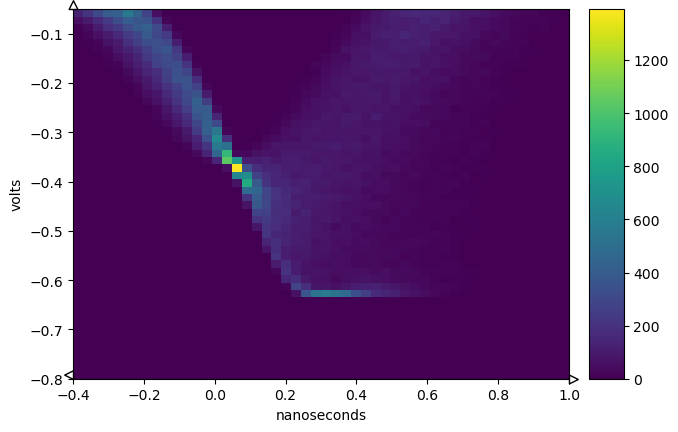

In [24]:
hist_2d = Hist(
    hist.axis.Regular(50,-0.4,1, name='nanoseconds'),
    hist.axis.Regular(50,-0.8, -0.05, name='volts'),
).fill(ak.flatten(nanoseconds), ak.flatten(mcp_waveform))

hep.hist2dplot(hist_2d)

Text(0, 1, 'mV')

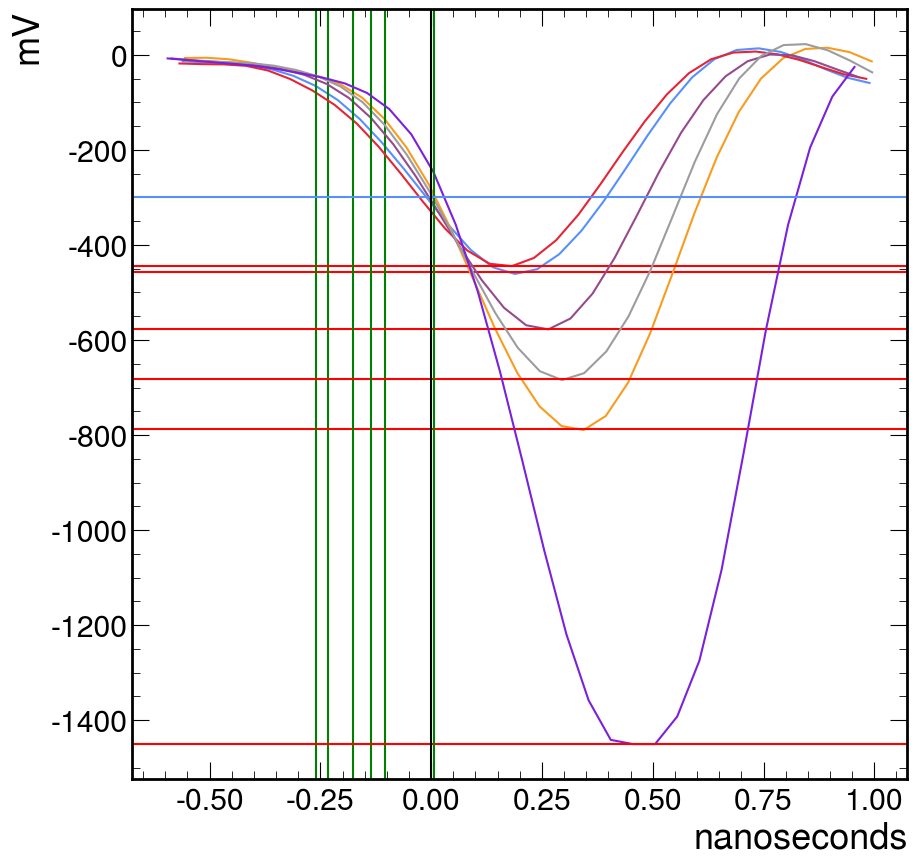

In [51]:
for i in range(0,6):
    window_cut = (nanoseconds[i] < 1) & (nanoseconds[i] > -0.6)
    plt.plot(nanoseconds[i][window_cut], mcp_waveform[i][window_cut]*1000, label='mcp')
    plt.axhline(-1*run.amp[:,0][i], color='red', label="amplitude")
    plt.axvline(run.LP2_20[:,0][i]*10**9, color='green')


# plt.axvline(0.05)
plt.axhline(-300, label='threshold')
plt.axvline(0, color='black')
plt.xlabel('nanoseconds')
plt.ylabel('mV')
# plt.legend()

# waveforms shifted by lp20

[1.7896273136138916, 0.6740009188652039, 0.5702216625213623, 0.6740009188652039, -0.3119015097618103, -1.7129207849502563, -1.9204790592193604, -1.1161903142929077, -1.219969630241394, -3.1398847103118896, -4.8781867027282715, -4.203621864318848, -1.6869759559631348, 0.05132569745182991, -0.2859567105770111, -1.76481032371521, -2.7247679233551025, -2.3355958461761475, -0.9864662885665894, 0.0772704929113388, -0.46757033467292786, -2.54315447807312, -4.644682884216309, -5.526806354522705, -6.0716471672058105, -7.706169605255127, -10.144980430603027, -12.272455215454102, -13.93292236328125, -15.671223640441895, -17.95436668395996, -22.05364418029785, -30.30409049987793, -44.44400405883789, -65.5371322631836, -95.32176208496094, -135.51025390625, -185.16860961914062, -240.89804077148438, -299.5592346191406, -358.142578125, -410.3954162597656, -447.055419921875, -461.1694030761719, -451.15472412109375, -419.4241943359375, -370.155029296875, -308.3026428222656, -239.23757934570312, -168.693

Text(0, 1, 'mV')

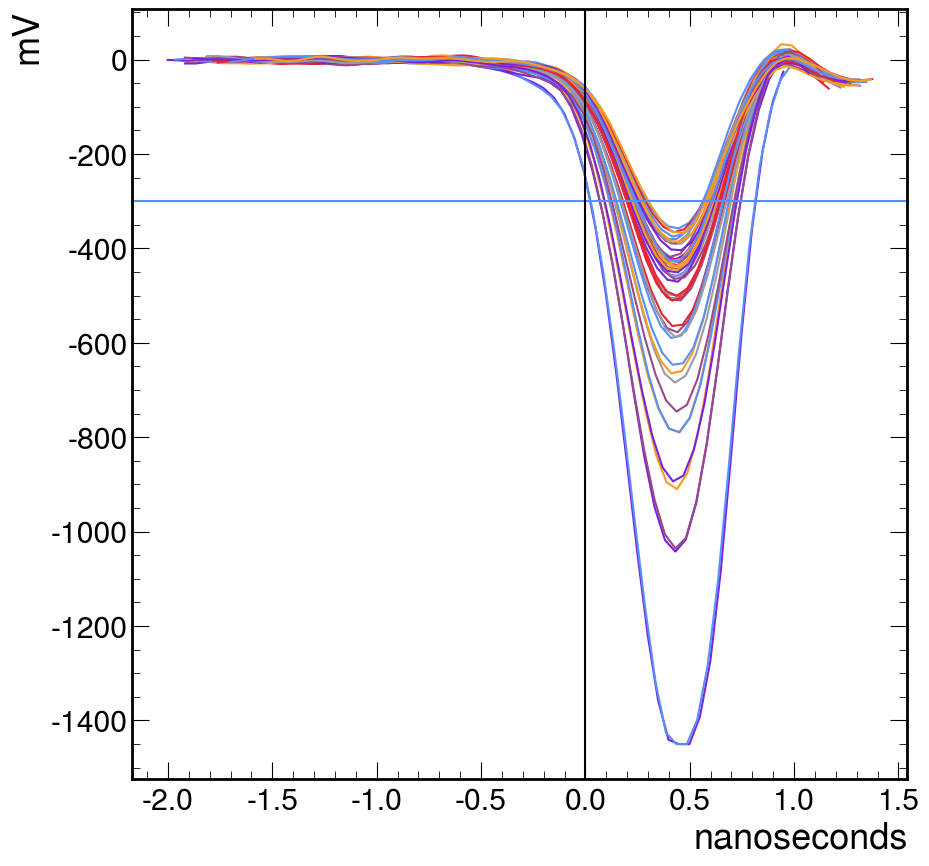

In [73]:
for i in range(0,50):
    window_cut = (nanoseconds[i] < 1) & (nanoseconds[i] > -2)
    plt.plot(
        nanoseconds[i][window_cut] - run.LP2_20[:,0][i]*10**9, 
        mcp_waveform[i][window_cut]*1000, label='mcp'
    )
    # plt.plot(
    #     nanoseconds[i][window_cut], 
    #     mcp_waveform[i][window_cut]*1000, label='mcp', color='grey'
    # )
print((mcp_waveform[0][window_cut]*1000).to_list())
print(np.diff(abs(mcp_waveform[0][window_cut]*1000)).to_list())

# plt.axvline(0.05)
plt.axhline(-300, label='threshold')
plt.axvline(0, color='black')
plt.xlabel('nanoseconds')
plt.ylabel('mV')
# plt.legend()

# find numbers before -20mV
# 

In [ ]:
for i in range(0,50):
    window_cut = (nanoseconds[i] < 1) & (nanoseconds[i] > -2)
    plt.plot(
        nanoseconds[i][window_cut] - run.LP2_20[:,0][i]*10**9, 
        mcp_waveform[i][window_cut]*1000, label='mcp'
    )

    amp = ak.max(mcp_waveform[i][window_cut]*1000)

    # plt.plot(
    #     nanoseconds[i][window_cut], 
    #     mcp_waveform[i][window_cut]*1000, label='mcp', color='grey'
    # )

# plt.axvline(0.05)
plt.axhline(-300, label='threshold')
plt.axvline(0, color='black')
plt.xlabel('nanoseconds')
plt.ylabel('mV')
# plt.legend()

0.09560826820785241
5000


ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7efec11567b0>, cbar=<matplotlib.colorbar.Colorbar object at 0x7efec1215f40>, text=[])

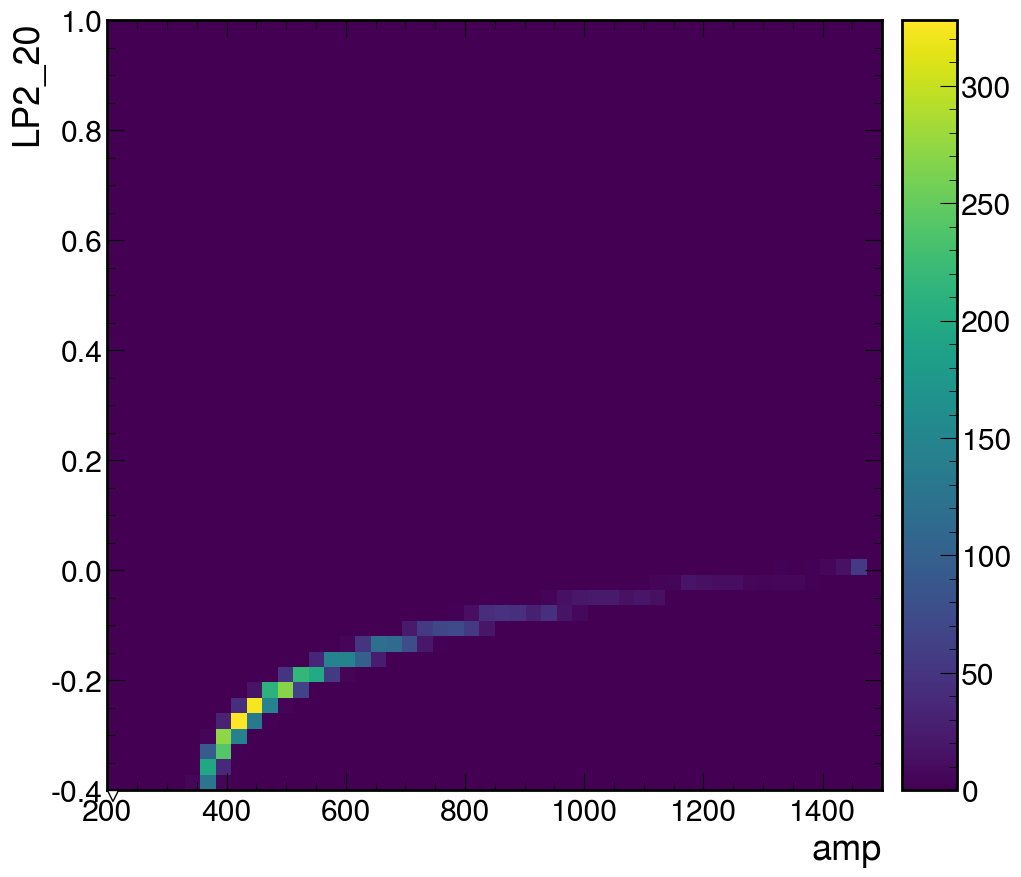

In [26]:
lp2 = run.LP2_20[:,0]*10**9
mcp_waveform = run.mcp_waveform[:,0]

print(ak.std(lp2))
print(len(mcp_waveform))
hist_2d = Hist(
    hist.axis.Regular(50,-0.4,1, name='LP2_20'),
    hist.axis.Regular(50,200, 1500, name='mcp_waveform'),
).fill(lp2,mcp_waveform).T

hep.hist2dplot(hist_2d)
# run.LP2_20



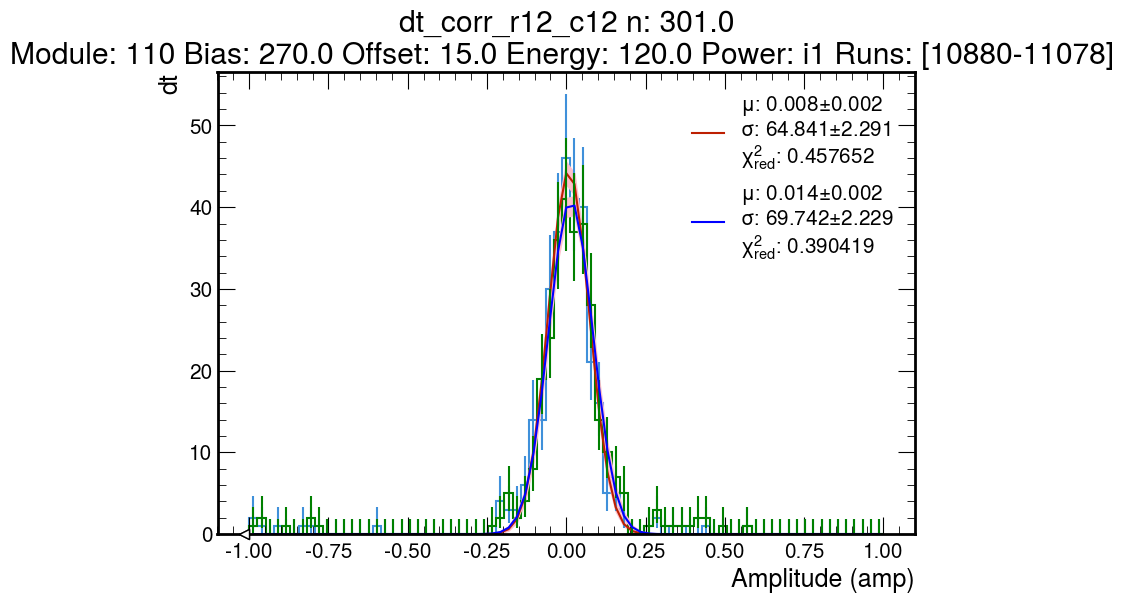

In [144]:
# lp2 = run.LP2_20[:,0]*10**9
# mcp_waveform = run.mcp_waveform[:,0]
import importlib

importlib.reload(pu)
importlib.reload(tw)

data_path = "/home/etl/Test_Stand/tbanalysis/output_analysis_data/SPS_Oct_dt_vs_amp/start_10880_stop_11078_setup_110_offset_15.0_energy_120.0_power_i1_module_110_bias_270_file_from_SPS_Oct_LP2_20_cubicLM_unbinned"
sps = pu.TBplot(
    data_path,
    load_full_collection=False
)
# sps.heatmap('amp','dt_corr',pix=(12,12))

# Perform linear fit
model = 'cubicLM'
amp = sps.get_field_vals('amp', pix=(12,12))
dt = sps.get_field_vals('dt_corr', pix=(12,12))

tw_corrections = tw.calc_timewalk_corrections_unbinned_general(amp, dt, model)
tw_adjustment = tw.predict(model, amp, tw_corrections)

sps.histo1D('dt_corr', pix=(12,12))

hist_axis = hist.axis.Regular(77,-1,1, name='dt_corr_2x')
dt_corr_2x = Hist(hist_axis).fill(dt-tw_adjustment)
hep.histplot(dt_corr_2x, color='green')
pu.plot_gauss_fit(dt_corr_2x, color='blue')

# plt.plot(amp_fit, dt_fit, color='red', label='Cubic Fit')
plt.xlabel('Amplitude (amp)')
plt.ylabel('dt')
plt.legend()
plt.show()

[<Parameter 'a', value=0.1788630220524467 +/- 0.562, bounds=[-inf:inf]>, <Parameter 'b', value=-0.0010770308207324053 +/- 0.00288, bounds=[-inf:0]>, <Parameter 'c', value=1.8864852300293222e-06 +/- 4.72e-06, bounds=[-inf:0.01]>, <Parameter 'd', value=-9.832217262584209e-10 +/- 2.46e-09, bounds=[-inf:0]>]
0.1788630220524467


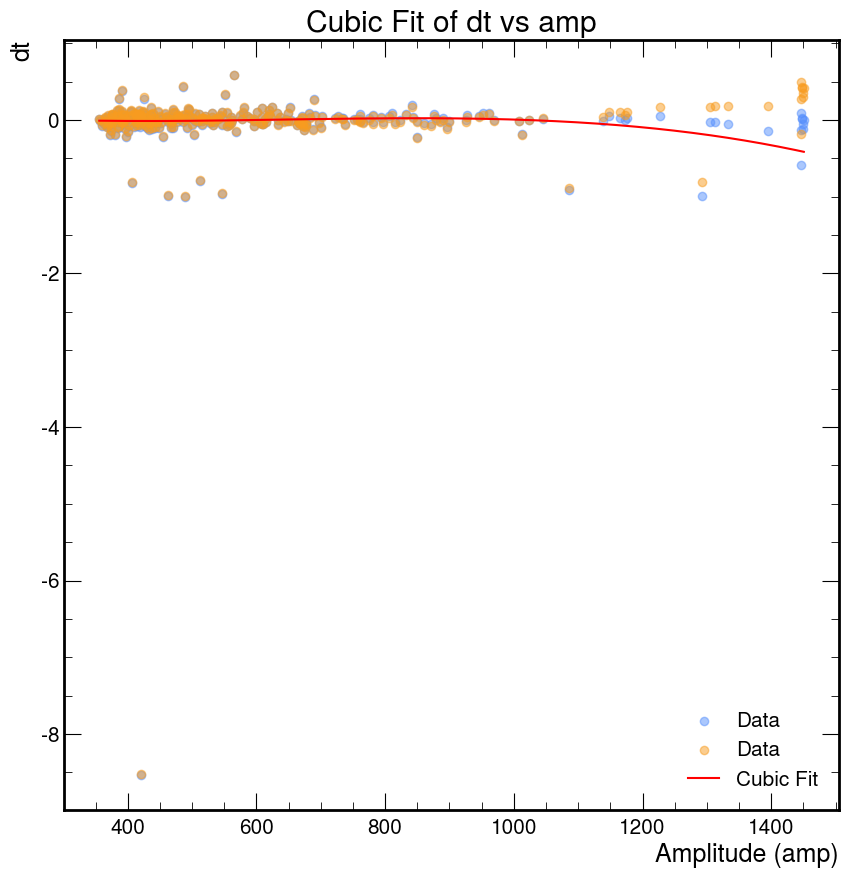

In [146]:
# lp2 = run.LP2_20[:,0]*10**9
# mcp_waveform = run.mcp_waveform[:,0]
# Perform linear fit
amp = sps.get_field_vals('amp', pix=(12,12))
dt = sps.get_field_vals('dt_corr', pix=(12,12))

# Create a polynomial function based on the coefficients
def linear(x, *p0):
    a, b = p0
    return a + b*x

def quad(x, *p0):
    a, b, c = p0
    return a + b*x + c*x**2

def cubic(x, *p0):
    a, b, c, d = p0
    return a + b*x + c*x**2 + d*x**3

# Generate data for the fitted curve
print([p for p in tw_corrections])
amp_fit = np.linspace(min(amp), max(amp), 500)
print(tw_corrections[0].value)
dt_fit = cubic(
    np.linspace(min(amp), max(amp), 500), 
    *[tw_corrections[0].value, tw_corrections[1].value, tw_corrections[2].value, tw_corrections[3].value]
)

# Plot the data and the cubic fit
plt.scatter(amp, dt, label='Data', alpha=0.5)
plt.scatter(amp, dt-tw_adjustment, label='Data', alpha=0.5)
plt.plot(amp_fit, dt_fit, color='red', label='Cubic Fit')
plt.xlabel('Amplitude (amp)')
plt.ylabel('dt')
plt.title('Cubic Fit of dt vs amp')
plt.legend()


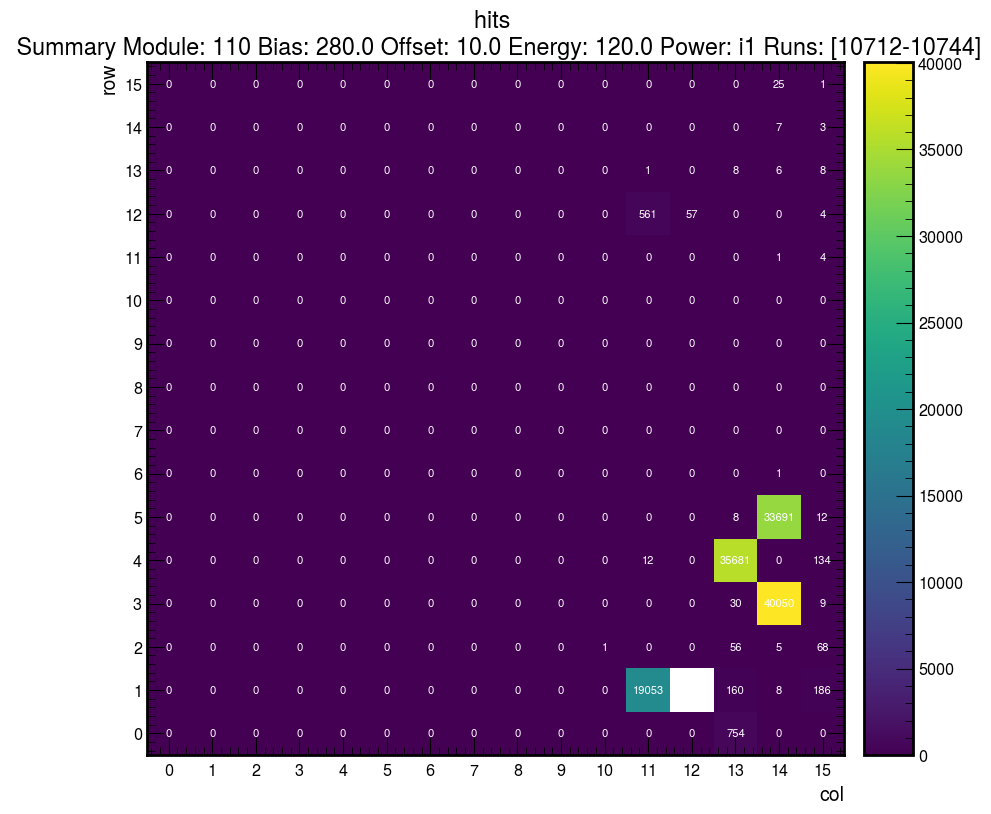

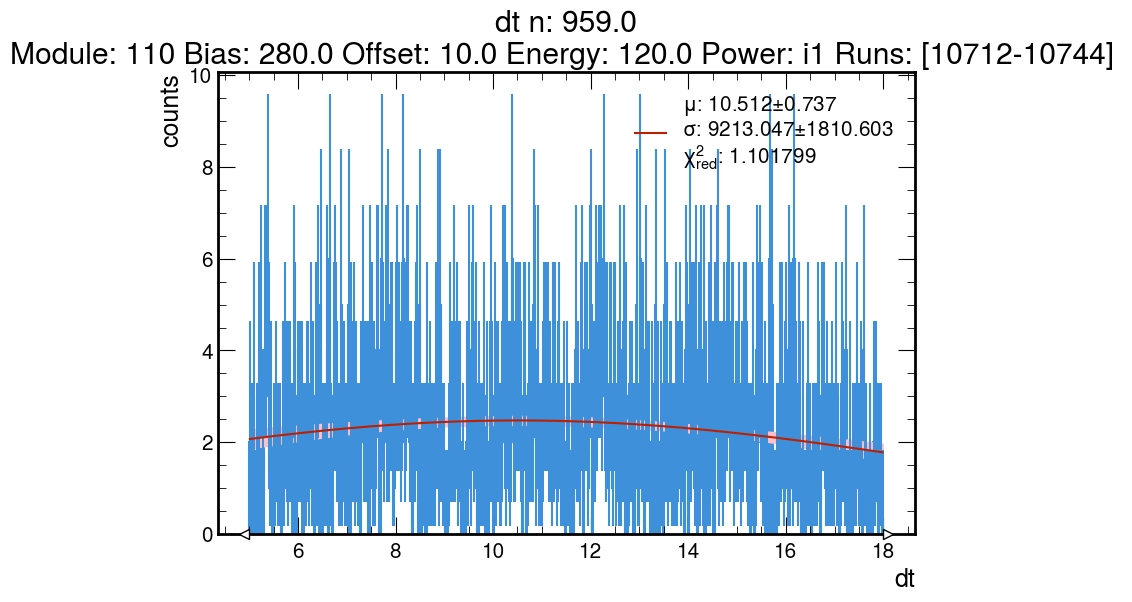

In [152]:
huh = pu.TBplot(
    "/home/etl/Test_Stand/tbanalysis/output_analysis_data/SPS_Oct_dt_vs_amp/start_10712_stop_10744_setup_110_offset_10.0_energy_120.0_power_i1_module_110_bias_280_file_from_SPS_Oct_LP2_20_cubicLM_unbinned"
    #"/home/etl/Test_Stand/tbanalysis/output_analysis_data/SPS_Oct_dt_vs_amp/start_10748_stop_10818_setup_110_offset_15.0_energy_120.0_power_i1_module_110_bias_280_file_from_SPS_Oct_LP2_20_cubicLM_unbinned"
    #"/home/etl/Test_Stand/tbanalysis/output_analysis_data/SPS_Oct_dt_vs_amp/start_10819_stop_10879_setup_110_offset_15.0_energy_120.0_power_i1_module_110_bias_270_file_from_SPS_Oct_LP2_20_cubicLM_unbinned"
)
huh.sensor_map('hits')



#10878

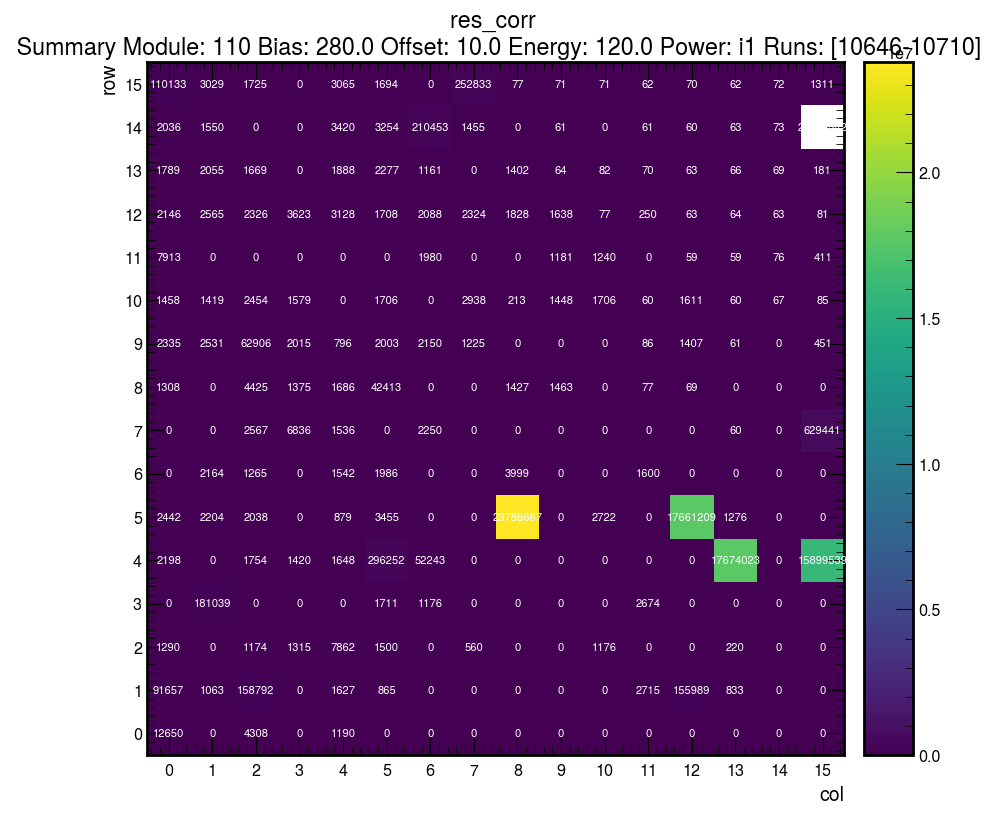

In [43]:
# 4 degrees celcius
four_celcius = pu.TBplot(
    # "/home/etl/Test_Stand/tbanalysis/output_analysis_data/SPS_Oct_dt_vs_amp/start_10434_stop_10633_setup_110_offset_10.0_energy_120.0_power_i1_module_110_bias_245_file_from_SPS_Oct_LP2_20_cubicLM_unbinned"
    "/home/etl/Test_Stand/tbanalysis/output_analysis_data/SPS_Oct_dt_vs_amp/start_10646_stop_10710_setup_110_offset_10.0_energy_120.0_power_i1_module_110_bias_280_file_from_SPS_Oct_LP2_20_cubicLM_unbinned"
)
#four_celcius.histo1D('dt_corr', pix=(14,12))
four_celcius.sensor_map('res_corr')


In [42]:
neg_four = pu.TBplot(
    # "/home/etl/Test_Stand/tbanalysis/output_analysis_data/SPS_Oct_dt_vs_amp/start_11362_stop_11761_setup_110_offset_15.0_energy_120.0_power_i1_module_110_bias_280_file_from_SPS_Oct_LP2_20_cubicLM_unbinned",
    "/home/etl/Test_Stand/tbanalysis/output_analysis_data/SPS_Oct_dt_vs_amp/start_11562_stop_11761_setup_110_offset_15.0_energy_120.0_power_i1_module_110_bias_280_file_from_SPS_Oct_LP2_20_cubicLM_unbinned",
    load_full_collection=True
)

# neg_four.heatmap('toa_code', 'tot_code')

In [39]:
# -12 degrees celcius
neg_twelve = pu.TBplot(
    "/home/etl/Test_Stand/tbanalysis/output_analysis_data/SPS_Oct_dt_vs_amp/start_10880_stop_11078_setup_110_offset_15.0_energy_120.0_power_i1_module_110_bias_270_file_from_SPS_Oct_LP2_20_cubicLM_unbinned",
    load_full_collection=True
)

cal_mode = neg_twelve.cal_modes
events = neg_twelve.events

cal_array = ak.zeros_like(events.row)
#amp_sel = abs(events.amp - amp_mode) <= 30

#Calculate cal code efficiency
for row in range(16):
    for col in range(16):
        pix_sel = ((events.row==row)&(events.col==col))
        cal_array = ak.where(pix_sel, cal_mode[row][col], cal_array) # think about cal_array = cal_mode[events.row, events.col]                    
        cal_sel = ((events.cal_code<(cal_mode[row][col]+2)) & (events.cal_code>(cal_mode[row][col]-2))) 

cal_sel = abs(events.cal_code - cal_array) <= 2


neg_twelve.events = events[cal_sel]
# neg_twelve.heatmap('tot_code','toa_code')
# neg_twelve.histo1D('dt', pix=(12,12))


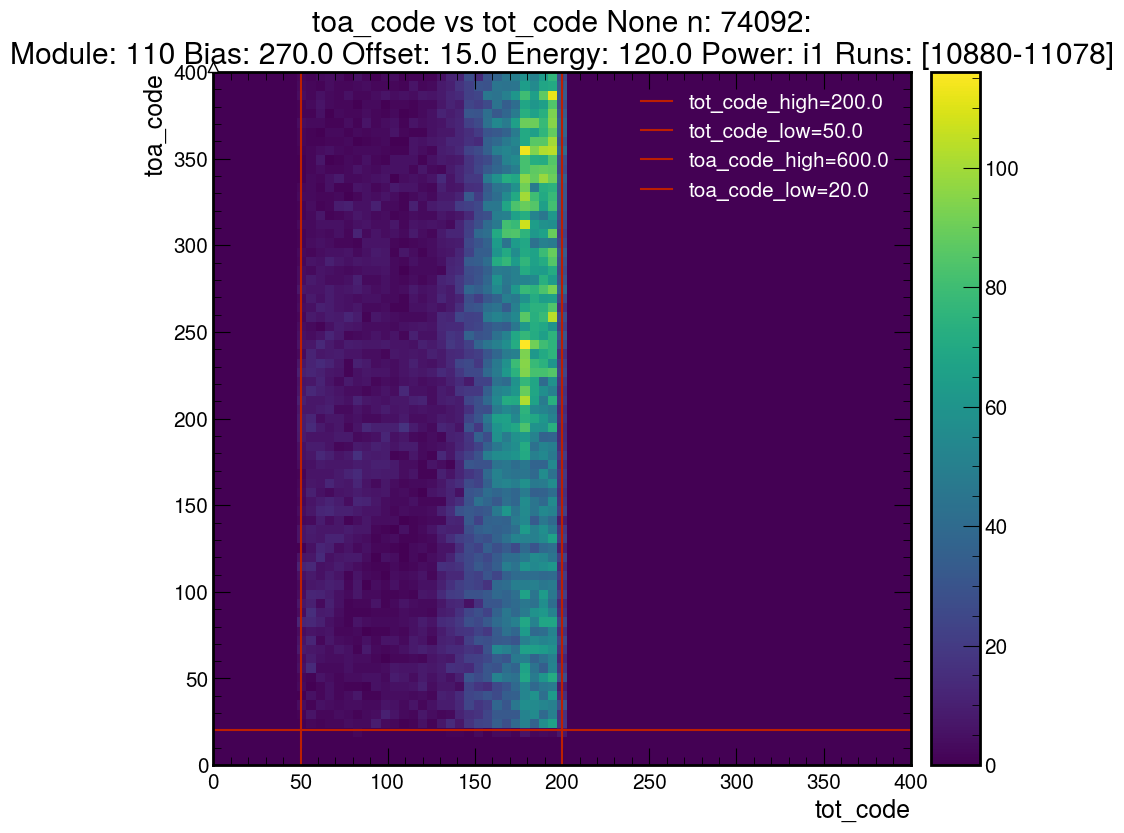

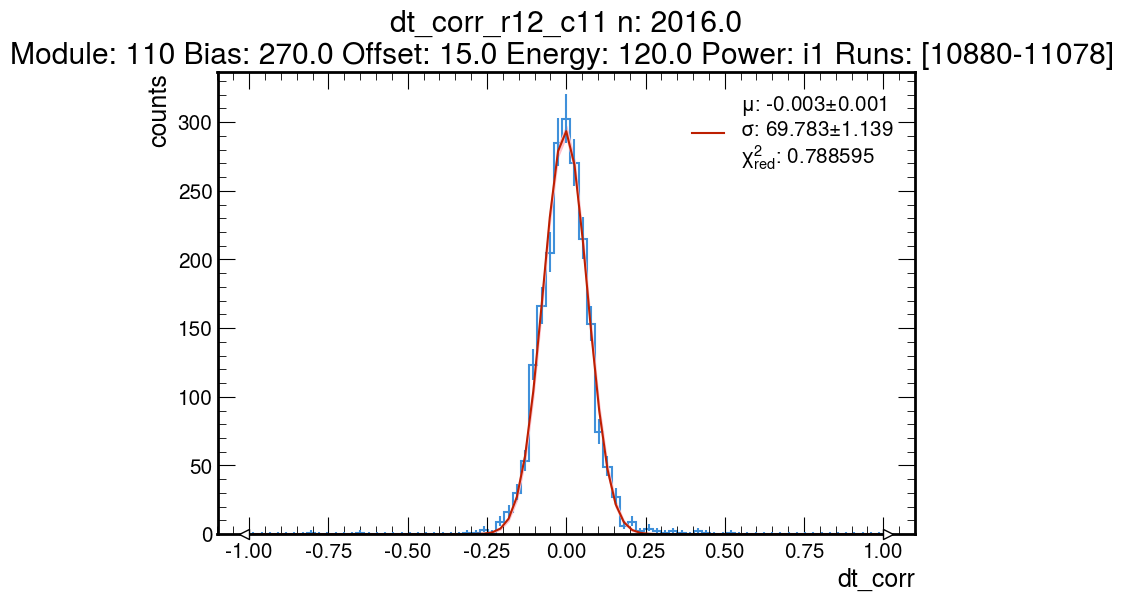

In [49]:
# -12 degrees celcius
neg_twelve = pu.TBplot(
    "/home/etl/Test_Stand/tbanalysis/output_analysis_data/SPS_Oct_dt_vs_amp/start_10880_stop_11078_setup_110_offset_15.0_energy_120.0_power_i1_module_110_bias_270_file_from_SPS_Oct_LP2_20_cubicLM_unbinned",
    load_full_collection=False
)

# cal_mode = neg_twelve.cal_modes
# events = neg_twelve.events

# cal_array = ak.zeros_like(events.row)
# #amp_sel = abs(events.amp - amp_mode) <= 30

# #Calculate cal code efficiency
# for row in range(16):
#     for col in range(16):
#         pix_sel = ((events.row==row)&(events.col==col))
#         cal_array = ak.where(pix_sel, cal_mode[row][col], cal_array) # think about cal_array = cal_mode[events.row, events.col]                    
#         cal_sel = ((events.cal_code<(cal_mode[row][col]+2)) & (events.cal_code>(cal_mode[row][col]-2))) 

# cal_sel = abs(events.cal_code - cal_array) <= 2

# tot_sel = (events.tot_code > 140) & (events.tot_code < 250)
# neg_twelve.events = events[cal_sel & tot_sel]
# neg_twelve.heatmap('tot_code','toa_code')
# neg_twelve.histo1D('dt_corr', pix=(14,12))
# neg_twelve.sensor_map('res_corr')
# neg_twelve.heatmap('tot_code', 'toa_code')
# neg_twelve.histo1D('dt_corr', pix=(12,11))

In [41]:
no_tot_sps = pu.TBplot(
    "/home/etl/Test_Stand/tbanalysis/output_analysis_data/SPS_Oct_weird_form/start_10880_stop_11078_setup_110_offset_15.0_energy_120.0_power_i1_module_110_bias_270_file_from_SPS_Oct_LP2_20_cubicLM_unbinned"
)

# no_tot_sps.heatmap('toa_code', 'tot_code')

# no_tot_sps.histo1D('dt_corr')

In [54]:
tot_sps = pu.TBplot(
    "/home/etl/Test_Stand/tbanalysis/output_analysis_data/SPS_Oct_weird_form_2/start_10880_stop_11078_setup_110_offset_15.0_energy_120.0_power_i1_module_110_bias_270_file_from_SPS_Oct_LP2_20_cubicLM_unbinned"
)

# tot_sps.heatmap('tot_code', 'toa_code')
# tot_sps.histo1D('dt_corr', pix=(14,12))
# tot_sps.cut_eff_plot()
# tot_sps.sensor_map('hits', cmax=7400)

# tot_sps.histo1D('dt_corr', pix=(14,12))

In [53]:
stress_test = pu.TBplot(
    "/home/etl/Test_Stand/tbanalysis/output_analysis_data/SPS_Oct_1p5KHZ/start_11310_stop_11330_setup_110_offset_10.0_energy_120.0_power_i1_module_110_bias_260_file_from_SPS_Oct_trigger_rate_1.5kHz_LP2_20_cubicLM_unbinned",
    load_full_collection=True
)

print(stress_test.events.fields)
stress_test.hist_bins['dt'] = (10,6.2,8)
stress_test.hist_bins['dt_corr'] = (10,-1,1)

# stress_test.sensor_map('hits')

# stress_test.histo1D('dt', pix=(13,11))
# stress_test.heatmap('toa_code', 'tot_code')

['row', 'col', 'tot_code', 'toa_code', 'cal_code', 'Clock', 'nhits', 'event', 'LP2_5', 'LP2_10', 'LP2_20', 'LP2_40', 'LP2_80', 'amp', 'timeoffsets', 'trigger', 'dt', 'chipid']


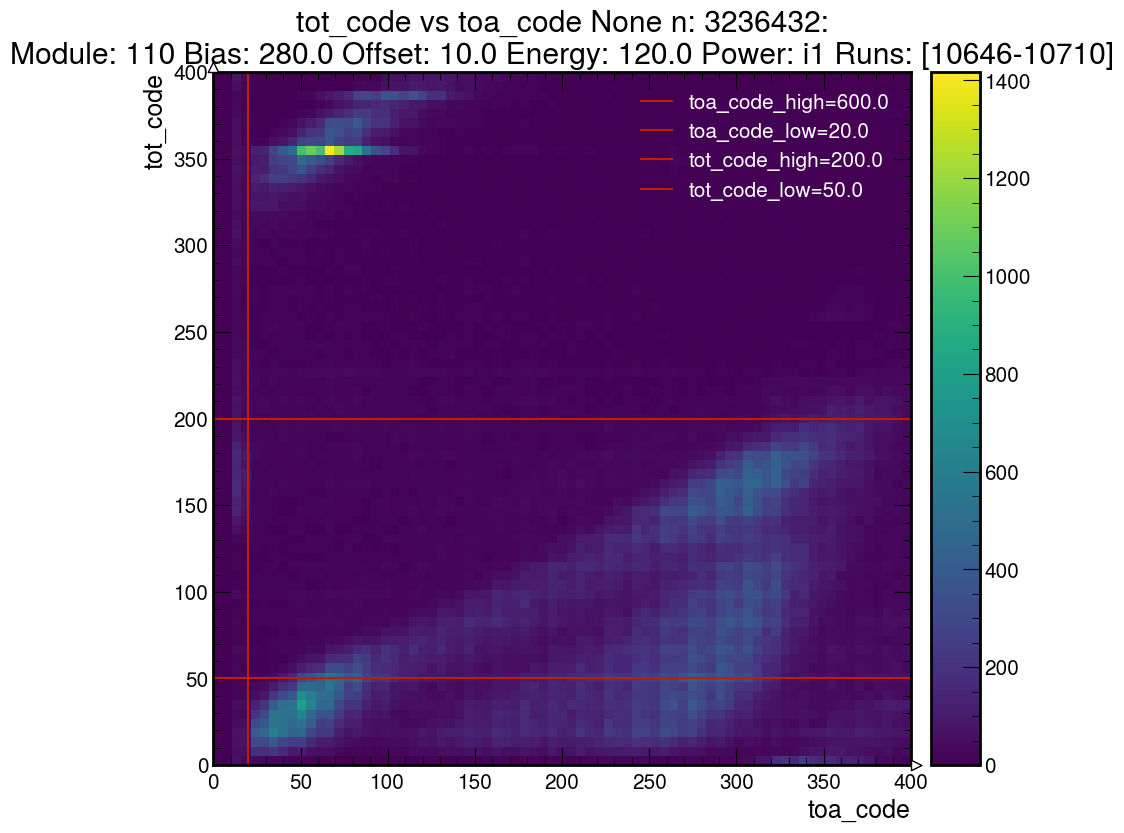

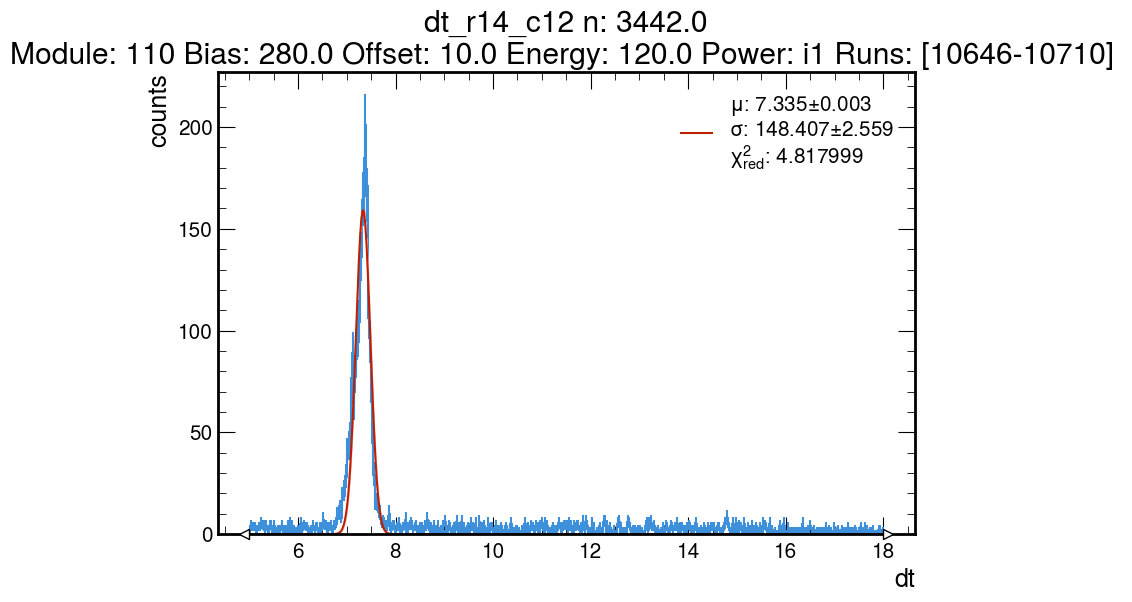

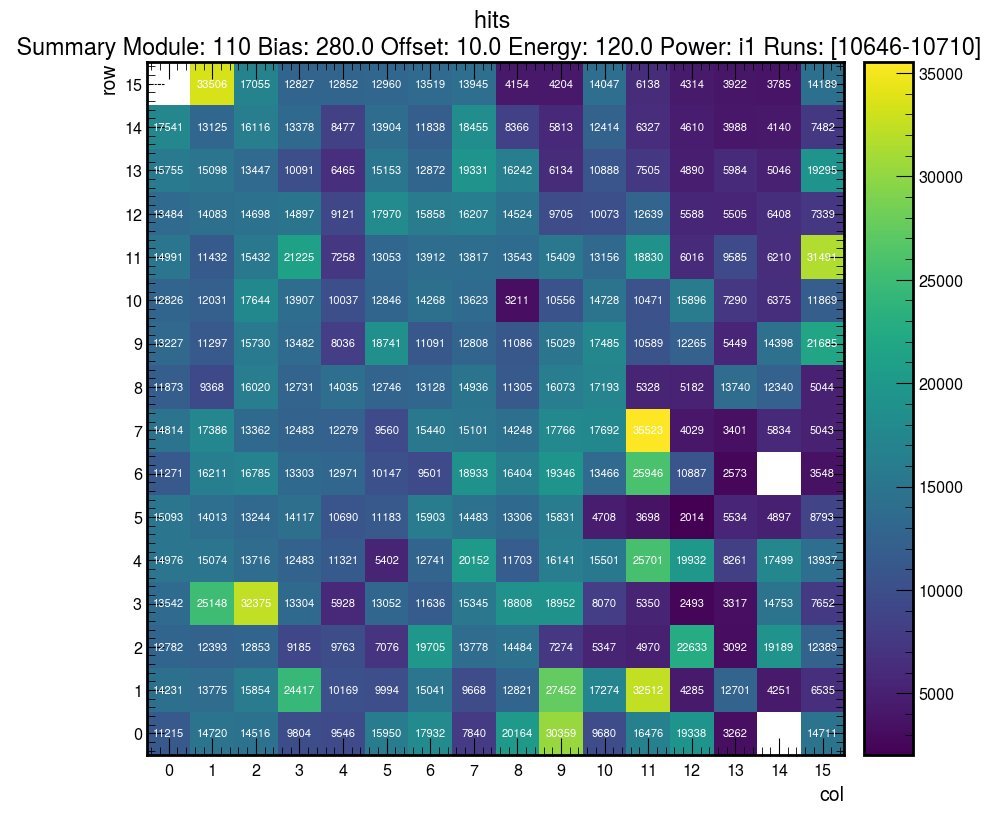

In [68]:
# 4 degrees celcius
four_celcius = pu.TBplot(
    #"/home/etl/Test_Stand/tbanalysis/output_analysis_data/SPS_Oct_dt_vs_amp/start_10434_stop_10633_setup_110_offset_10.0_energy_120.0_power_i1_module_110_bias_245_file_from_SPS_Oct_LP2_20_cubicLM_unbinned"
    "/home/etl/Test_Stand/tbanalysis/output_analysis_data/SPS_Oct_dt_vs_amp/start_10646_stop_10710_setup_110_offset_10.0_energy_120.0_power_i1_module_110_bias_280_file_from_SPS_Oct_LP2_20_cubicLM_unbinned",
    load_full_collection=True
)
cal_mode = four_celcius.cal_modes
events = four_celcius.events

cal_array = ak.zeros_like(events.row)
#amp_sel = abs(events.amp - amp_mode) <= 30

#Calculate cal code efficiency
for row in range(16):
    for col in range(16):
        pix_sel = ((events.row==row)&(events.col==col))
        cal_array = ak.where(pix_sel, cal_mode[row][col], cal_array) # think about cal_array = cal_mode[events.row, events.col]                    
        cal_sel = ((events.cal_code<(cal_mode[row][col]+2)) & (events.cal_code>(cal_mode[row][col]-2))) 

cal_sel = abs(events.cal_code - cal_array) <= 2

#four_celcius.events = four_celcius.events[cal_sel]
four_celcius.heatmap('toa_code', 'tot_code')
four_celcius.histo1D('dt', pix=(14,12))
# four_celcius.histo1D('dt_corr', pix=(14,12))
four_celcius.sensor_map('hits')

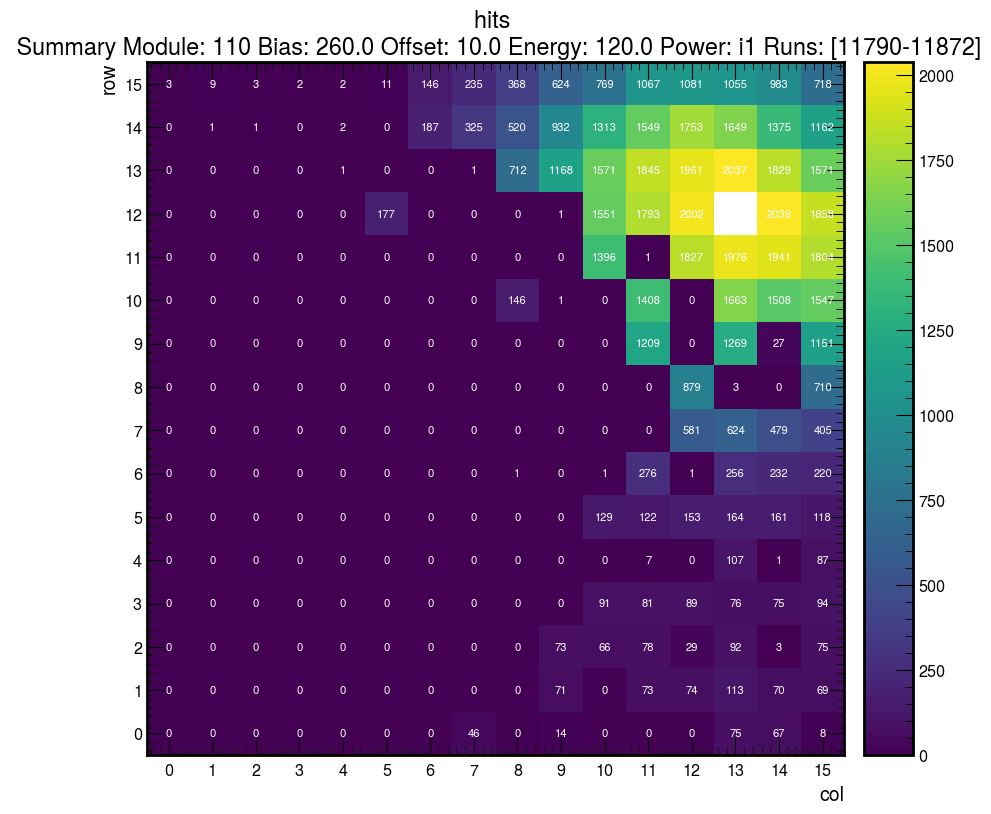

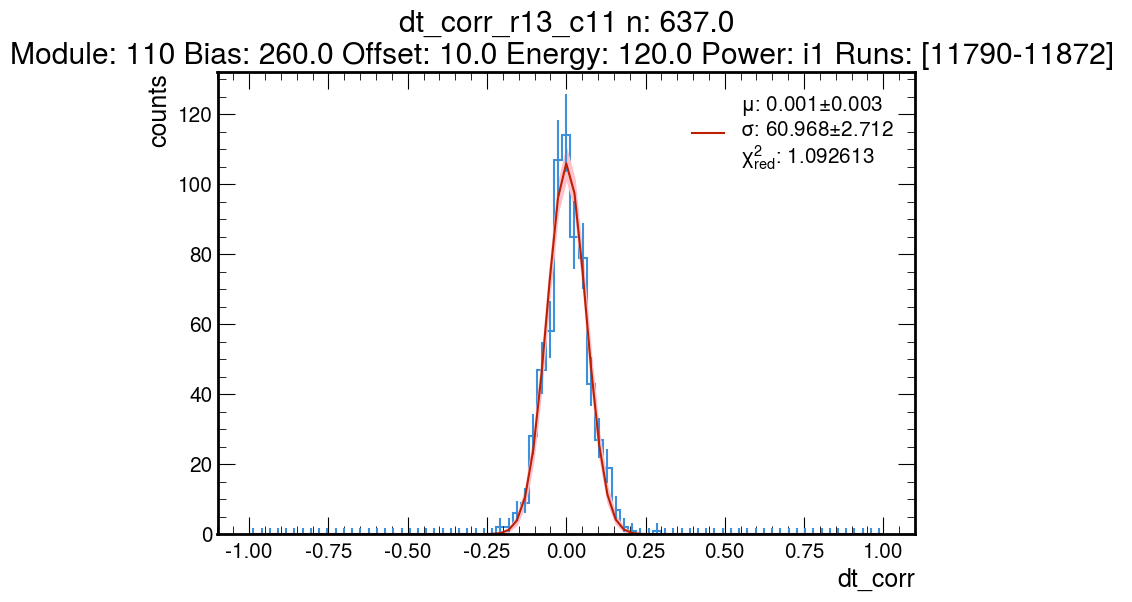

In [72]:
# #------------- NEGATIVE 4 DEGREES CELCIUS
neg_four = pu.TBplot(
    # "/home/etl/Test_Stand/tbanalysis/output_analysis_data/SPS_Oct_dt_vs_amp/start_11362_stop_11761_setup_110_offset_15.0_energy_120.0_power_i1_module_110_bias_280_file_from_SPS_Oct_LP2_20_cubicLM_unbinned",
    #"/home/etl/Test_Stand/tbanalysis/output_analysis_data/SPS_Oct_dt_vs_amp/start_11562_stop_11761_setup_110_offset_15.0_energy_120.0_power_i1_module_110_bias_280_file_from_SPS_Oct_LP2_20_cubicLM_unbinned",
    #/home/etl/Test_Stand/tbanalysis/output_analysis_data/SPS_Oct_1p5KHZ/start_11762_stop_11872_setup_110_offset_10.0_energy_120.0_power_i1_module_110_bias_260_file_from_SPS_Oct_trigger_rate_5kHz_LP2_20_cubicLM_unbinned",
    "/home/etl/Test_Stand/tbanalysis/output_analysis_data/SPS_Oct_1p5KHZ/start_11790_stop_11872_setup_110_offset_10.0_energy_120.0_power_i1_module_110_bias_260_file_from_SPS_Oct_trigger_rate_5kHz_LP2_20_cubicLM_unbinned",
    load_full_collection=False
)

neg_four.sensor_map('hits')
neg_four.histo1D('dt_corr', pix=(13,11))

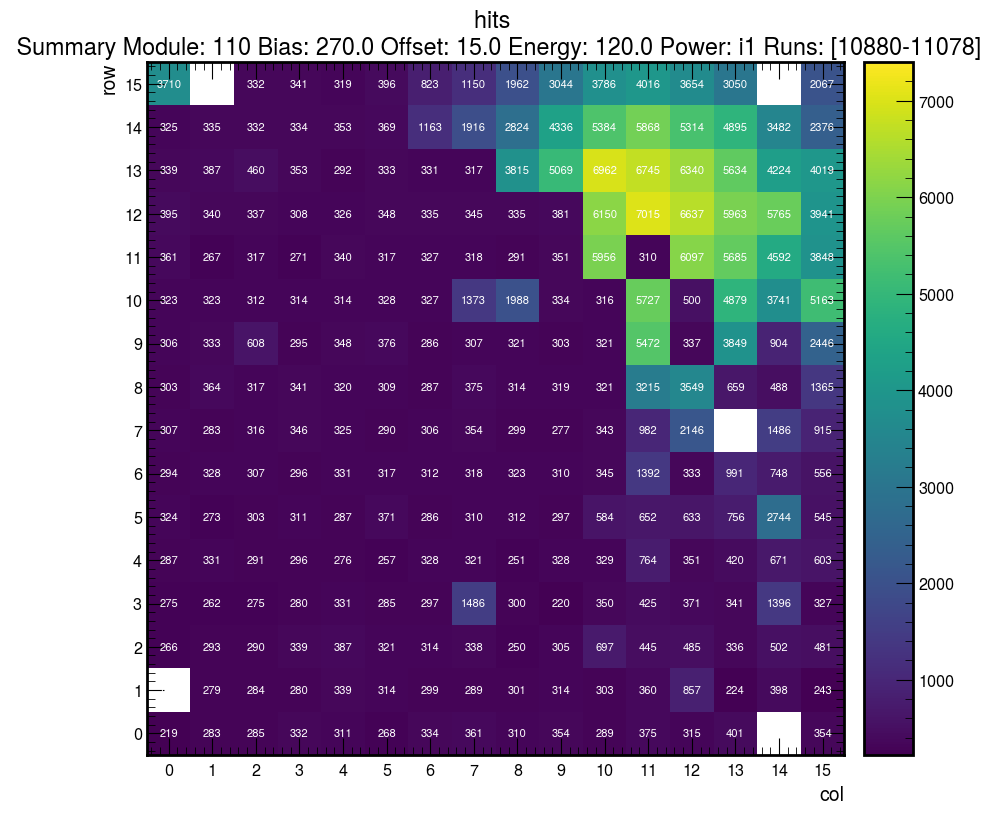

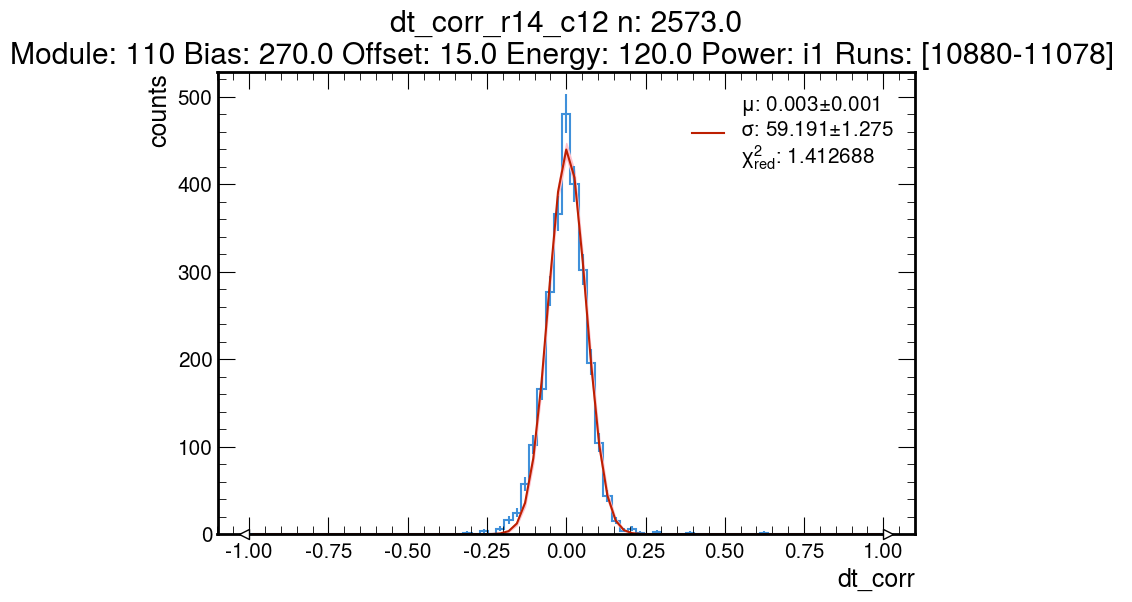

In [60]:
#------------- NEGATIVE 12 DEGREES CELCIUS

tot_sps = pu.TBplot(
    "/home/etl/Test_Stand/tbanalysis/output_analysis_data/SPS_Oct_weird_form_2/start_10880_stop_11078_setup_110_offset_15.0_energy_120.0_power_i1_module_110_bias_270_file_from_SPS_Oct_LP2_20_cubicLM_unbinned"
)

# tot_sps.heatmap('tot_code', 'toa_code')
# tot_sps.histo1D('dt_corr', pix=(14,12))
# tot_sps.cut_eff_plot()
tot_sps.sensor_map('hits', cmax=7400)
tot_sps.histo1D('dt_corr', pix=(14,12))